In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [3]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역,승차,234.0
1,2008-01-01,150.0,서울역,승차,-420.0
2,2008-01-01,150.0,서울역,승차,-318.0
3,2008-01-01,150.0,서울역,승차,-161.0
4,2008-01-01,150.0,서울역,승차,-205.0
5,2008-01-01,150.0,서울역,승차,13.0
6,2008-01-01,150.0,서울역,승차,538.0
7,2008-01-01,150.0,서울역,승차,632.0
8,2008-01-01,150.0,서울역,승차,604.0
9,2008-01-01,150.0,서울역,승차,808.0


In [17]:
df[df['name']=='강남']

,date,number,name,div,a
620,2008-01-01,222.0,강남,승차,945.0
621,2008-01-01,222.0,강남,승차,314.0
622,2008-01-01,222.0,강남,승차,-64.0
623,2008-01-01,222.0,강남,승차,-205.0
624,2008-01-01,222.0,강남,승차,-806.0
625,2008-01-01,222.0,강남,승차,-405.0
626,2008-01-01,222.0,강남,승차,-336.0
627,2008-01-01,222.0,강남,승차,-474.0
628,2008-01-01,222.0,강남,승차,-628.0
629,2008-01-01,222.0,강남,승차,-584.0


In [4]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [5]:
df['name']

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [6]:
s = df['name']
s

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [15]:
s = list(sorted(set(s)))
s

['가락시장',
 '가산디지털단지',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강변',
 '개롱',
 '개화산',
 '거여',
 '건대입구',
 '경복궁',
 '경찰병원',
 '고덕',
 '고려대',
 '고속터미널',
 '공덕',
 '공릉',
 '광나루',
 '광명사거리',
 '광화문',
 '광흥창',
 '교대',
 '구로디지털단지',
 '구산',
 '구의',
 '구파발',
 '군자',
 '굴포천',
 '굽은다리',
 '금호',
 '길동',
 '길음',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '남구로',
 '남부터미널',
 '남성',
 '남태령',
 '남한산성입구',
 '내방',
 '노원',
 '녹번',
 '녹사평',
 '논현',
 '단대오거리',
 '답십리',
 '당고개',
 '당산',
 '대림',
 '대청',
 '대치',
 '대흥',
 '도곡',
 '도림천',
 '도봉산',
 '독립문',
 '독바위',
 '돌곶이',
 '동대문',
 '동대문역사문화공원',
 '동대입구',
 '동묘앞',
 '동작',
 '둔촌동',
 '디지털미디어시티',
 '뚝섬',
 '뚝섬유원지',
 '마곡',
 '마들',
 '마장',
 '마천',
 '마포',
 '마포구청',
 '망원',
 '매봉',
 '먹골',
 '면목',
 '명동',
 '명일',
 '모란',
 '목동',
 '몽촌토성',
 '무악재',
 '문래',
 '문정',
 '미아',
 '미아사거리',
 '반포',
 '발산',
 '방배',
 '방이',
 '방화',
 '버티고개',
 '보라매',
 '보문',
 '복정',
 '봉천',
 '봉화산',
 '부천시청',
 '부천종합운동장',
 '부평구청',
 '불광',
 '사가정',
 '사당',
 '산성',
 '삼각지',
 '삼산체육관',
 '삼성',
 '상계',
 '상도',
 '상동',
 '상봉',
 '상수',
 '상왕십리',
 '상월곡',
 '상일동',
 '새절',
 '서대문',
 '서울대입구',
 '서울역',
 '서초',
 '석계',
 '석촌',
 

In [8]:
len(s)

241

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [10]:
s[1]

'당고개'

In [11]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [12]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [13]:
data1 = df[df['name']==s[1]]

In [14]:
data1.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [15]:
data1

,date,number,name,div,a
800,2008-01-01,231.0,신대방,승차,135.0
801,2008-01-01,231.0,신대방,승차,8.0
802,2008-01-01,231.0,신대방,승차,160.0
803,2008-01-01,231.0,신대방,승차,330.0
804,2008-01-01,231.0,신대방,승차,448.0
805,2008-01-01,231.0,신대방,승차,384.0
806,2008-01-01,231.0,신대방,승차,159.0
807,2008-01-01,231.0,신대방,승차,248.0
808,2008-01-01,231.0,신대방,승차,228.0
809,2008-01-01,231.0,신대방,승차,145.0


In [16]:
len(data1)

78520

In [17]:
data1.shape

(78520, 5)

In [21]:
data1 = df[df['name']=='강남']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

                date  number name div        a
620       2008-01-01   222.0   강남  승차    945.0
621       2008-01-01   222.0   강남  승차    314.0
622       2008-01-01   222.0   강남  승차    -64.0
623       2008-01-01   222.0   강남  승차   -205.0
624       2008-01-01   222.0   강남  승차   -806.0
625       2008-01-01   222.0   강남  승차   -405.0
626       2008-01-01   222.0   강남  승차   -336.0
627       2008-01-01   222.0   강남  승차   -474.0
628       2008-01-01   222.0   강남  승차   -628.0
629       2008-01-01   222.0   강남  승차   -584.0
630       2008-01-01   222.0   강남  승차   -661.0
631       2008-01-01   222.0   강남  승차   -751.0
632       2008-01-01   222.0   강남  승차   -839.0
633       2008-01-01   222.0   강남  승차   -723.0
634       2008-01-01   222.0   강남  승차   -198.0
635       2008-01-01   222.0   강남  승차    800.0
636       2008-01-01   222.0   강남  승차   1650.0
637       2008-01-01   222.0   강남  승차   1725.0
638       2008-01-01   222.0   강남  승차    507.0
639       2008-01-01   222.0   강남  승차    -58.0
5860      200

In [22]:
data

array([[  945.],
       [  314.],
       [  -64.],
       ...,
       [ 3692.],
       [ 1239.],
       [-1845.]], dtype=float32)

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

In [24]:
# model = Sequential()
# model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(512, input_shape=(None, 1)))
# model.add(Dropout(0.3))
# # model.add(LSTM(i, input_shape=(None, 1)))

# # model.add(Dense(i))
# # model.add(Dropout(0.3))
# # model.add(Dropout(0.3))
# # model.add(Dense(64))

# model.add(Dense(1))
# name = "tt.jpg"
# # 모델 학습과정 설정하기
# model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
# model.summary()
# hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
from keras.models import load_model
model = load_model('trythis.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


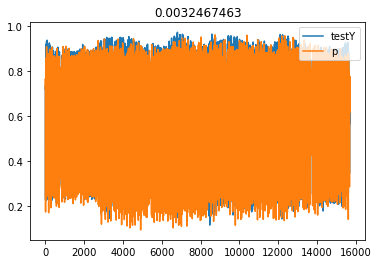

0.0032467463


In [25]:
p = model.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

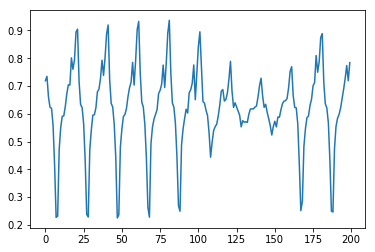

In [26]:
plt.plot(y_test[:200])

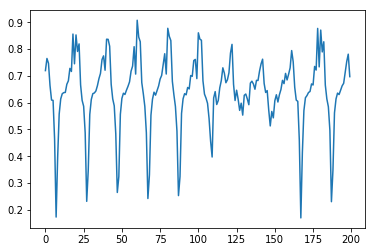

In [27]:
plt.plot(p[:200])

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file : 
#     json_file.write(model_json)
# model.save_weights("model.h5")
# print("Saved model to disk")

In [ ]:
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
# # Plot training & validation loss values

# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
p = model.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')


In [ ]:
plt.plot(p)

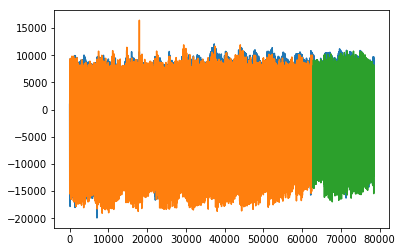

In [28]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

(15684, 1)

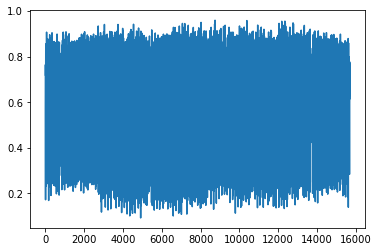

In [29]:
plt.plot(p)
p.shape

In [ ]:
testPredictPlot

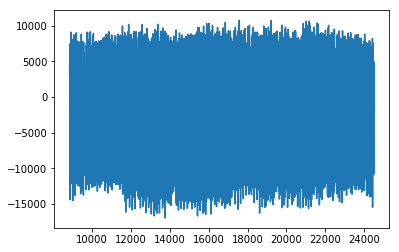

In [38]:
plt.plot(testPredictPlot[54000:])


In [54]:
y = p
x = list(range(len(p)))
x = np.reshape(x, (-1, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8)
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train, y_train)


C:\Users\ML\Anaconda3\envs\me\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

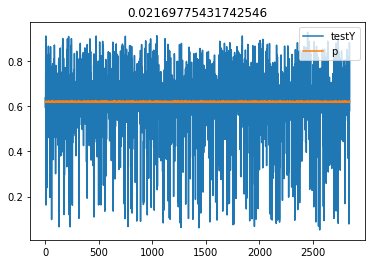

0.02169775431742546


In [55]:
p = model.predict(X_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [33]:
import math
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# 마지막으로 모델의 기술을 시각적으로 표시하기 위해 열차 및 테스트 데이터 세트 모두에 대해 모델을 사용하여 예측을 생성 할 수 있습니다.

# 데이터 세트가 준비되었으므로, x 축에서 원래 데이터 세트와 정렬되도록 예측을 이동해야합니다. 준비가 완료되면 데이터가 그려져 원본 데이터 세트가 파란색으로 표시되고 교육 데이터 세트의 녹색 예측이 표시되며 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시됩니다.

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p